<a href="https://colab.research.google.com/github/XLDiaz/MLearning_HEConsumption/blob/main/Limpieza_de_Datos_y_Visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar Datos & Preprocesamiento:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import matplotlib.ticker as tkr
%matplotlib inline
import plotly as py
import plotly.graph_objs as go

from time import time
from datetime import datetime

from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
#   Importar el archivo y eliminar las columnas q no se necesitan
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';', header=0, low_memory=False)
print(f'El Dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas')
df.head()

El Dataframe contiene 2075259 filas y 9 columnas


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [26]:
#   Renombrando las columnas:
df = df.rename(columns={
    'Global_active_power': 'Potencia_Activa'
    })

#   Fijar a NaN los valores perdidos:
df.replace('?', np.nan, inplace=True)

#   Cambiar el tipo de dato de las columnas (objeto -> float):
df['Potencia_Activa'] = df['Potencia_Activa'].astype(float)

#   Fijar la media en los NaN fijados:
"""
Este metodo mantiene la media de los datos
"""
data_without_nan = df['Potencia_Activa'].dropna(axis=0)
data_mean = data_without_nan.mean()
df['Potencia_Activa'].replace(np.nan, data_mean, inplace=True)

In [27]:
#   Crear una sola columna con el timestamp:
df['Fecha'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Fecha'] = pd.to_datetime(df['Fecha'])

df['Año'] = df['Fecha'].apply(lambda x: x.year)
df['Trimestre'] = df['Fecha'].apply(lambda x: x.quarter)
df['Mes'] = df['Fecha'].apply(lambda x: x.month)
df['Día'] = df['Fecha'].apply(lambda x: x.day)
df["Día_Semana"]=df.apply(lambda row: row["Fecha"].weekday(),axis=1)
df["Día_Semana"] = (df["Día_Semana"] < 5).astype(int)

df.sort_values('Fecha', inplace=True, ascending=True)
df = df.reset_index(drop=True)

df=df.loc[:,['Fecha','Potencia_Activa', 'Año','Trimestre','Mes','Día','Día_Semana']]

In [49]:
df.loc[:,['Fecha','Potencia_Activa', 'Año','Trimestre','Mes','Día','Día_Semana']].to_csv("/content/drive/MyDrive/XLDiaz/MLearning_HEConsumption/HEC_Data.csv", sep = ",", index = "Fecha")

In [23]:
df.head()

,Fecha,Potencia_Activa,Año,Trimestre,Mes,Día
0,2006-12-16 17:24:00,4.2160,2006,4,12,16
1,2006-12-16 17:25:00,5.3600,2006,4,12,16
2,2006-12-16 17:26:00,5.3740,2006,4,12,16
3,2006-12-16 17:27:00,5.3880,2006,4,12,16
4,2006-12-16 17:28:00,3.6660,2006,4,12,16


In [9]:
df.tail()

,Date,Time,Potencia_Activa,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.9460,0.000,240.430,4.000,0.000,0.000,0.0000
2075255,26/11/2010,20:59:00,0.9440,0.000,240.000,4.000,0.000,0.000,0.0000
2075256,26/11/2010,21:00:00,0.9380,0.000,239.820,3.800,0.000,0.000,0.0000
2075257,26/11/2010,21:01:00,0.9340,0.000,239.700,3.800,0.000,0.000,0.0000
2075258,26/11/2010,21:02:00,0.9320,0.000,239.550,3.800,0.000,0.000,0.0000


#Plot de la Serie


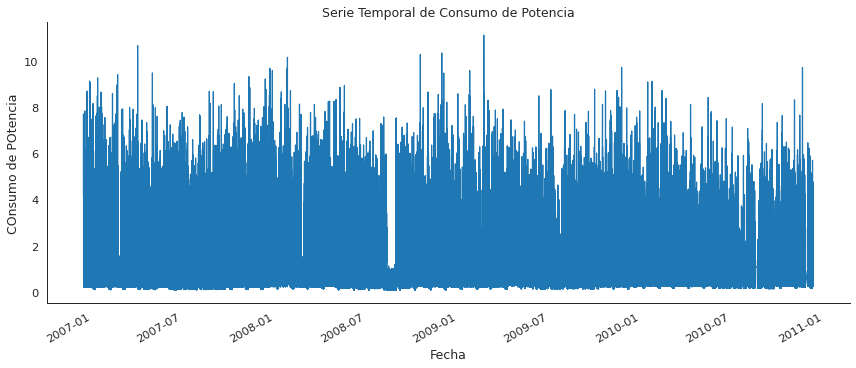

In [12]:
df1=df.loc[:,['Fecha','Potencia_Activa']]
df1.set_index('Fecha',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('COnsumo de POtencia')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Serie Temporal de Consumo de Potencia')
sns.despine(top=True)
plt.show();

**Zoom a solo 15 días**

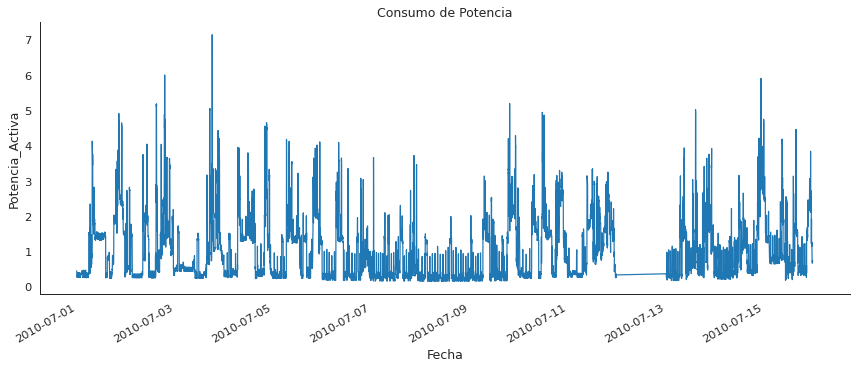

In [13]:

df2=df1[(df1.index>='2010-07-01') & (df1.index<'2010-7-16')]
df2.plot(figsize=(12,5));
plt.ylabel('Potencia_Activa')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.title("Consumo de Potencia")
plt.show();

#Estudio de la Distribución de Consumo de Potencia



**D’Agostino’s K^2 Test**

---


p <= alpha: No  posee distribución normal.

p > alpha: Posee distribución normal.

alph = 0.05

In [11]:
 stat, p = stats.normaltest(df.Potencia_Activa)
print('Estadística=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Los datos poseen distribución normal')
else:
    print('Los datos no poseen distribución normal')

Estadística=741661.563, p=0.000
Los datos no poseen distribución normal


,count,mean,std,min,25%,50%,75%,max
Potencia_Activa,2075259.0000,1.0916,1.0507,0.0760,0.3100,0.6300,1.5200,11.1220


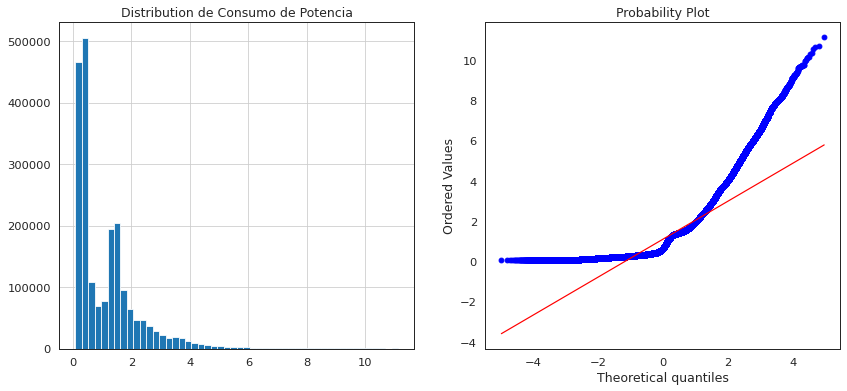

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Potencia_Activa'].hist(bins=50)
plt.title('Distribution de Consumo de Potencia')

plt.subplot(1,2,2)
stats.probplot(df['Potencia_Activa'], plot=plt);
df1.describe().T

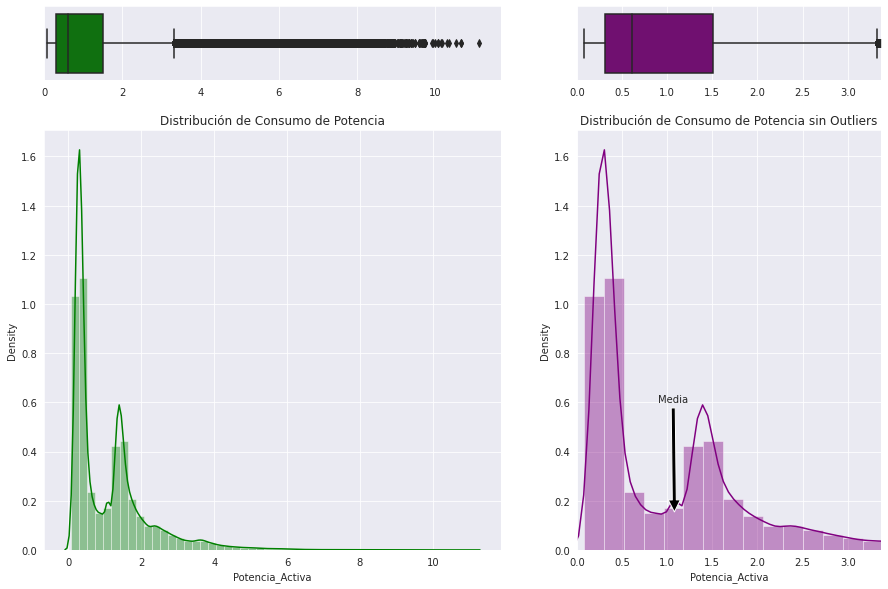

In [ ]:
# Crear subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Boxplot
sns.boxplot(df['Potencia_Activa'] , color="green", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Distribución de Consumo de Potencia
sns.distplot(df['Potencia_Activa'] , color="green", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribución de Consumo de Potencia')

# Boxplot con Zoom
sns.boxplot(df['Potencia_Activa'], color="purple", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

# Distribución con Zoom
sns.distplot(df['Potencia_Activa'], color="purple", ax=axes[1,1])
axes[1,1].set_title('Distribución de Consumo de Potencia sin Outliers')
axes[1,1].set_xlim(0, 3.37) 

# Marcador de la Media
axes[1,1].annotate(
'Media', xy=(df['Potencia_Activa'].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()

#Características de la Serie Temporal de Consumo de Potencia





**Muestreo de consumo de potencia promedio durante el día, semana, mes, trimestre y año.**

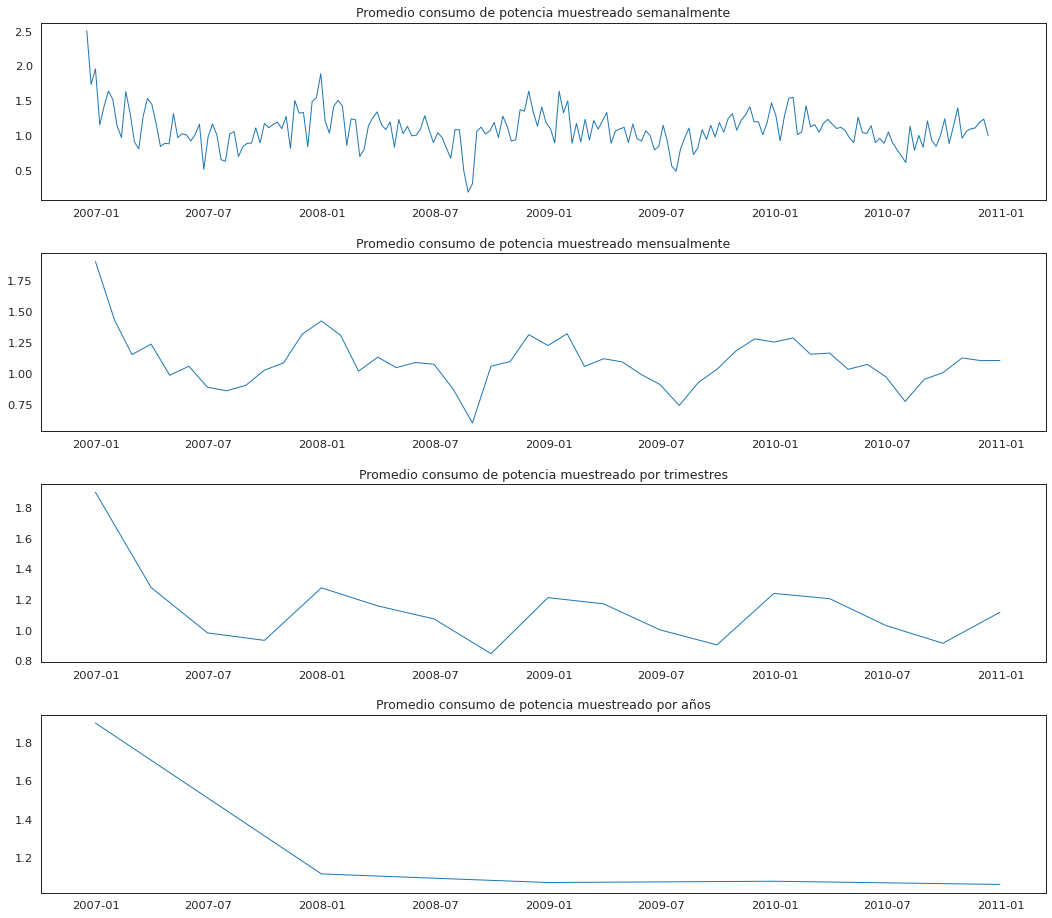

In [14]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.3)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(df1['Potencia_Activa'].resample('W').mean(),linewidth=1)
ax1.set_title('Promedio consumo de potencia muestreado semanalmente')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(4,1,2, sharex=ax1)
ax2.plot(df1['Potencia_Activa'].resample('M').mean(),linewidth=1)
ax2.set_title('Promedio consumo de potencia muestreado mensualmente')
ax2.tick_params(axis='both', which='major')

ax3  = fig.add_subplot(4,1,3, sharex=ax1)
ax3.plot(df1['Potencia_Activa'].resample('Q').mean(),linewidth=1)
ax3.set_title('Promedio consumo de potencia muestreado por trimestres')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(df1['Potencia_Activa'].resample('A').mean(),linewidth=1)
ax4.set_title('Promedio consumo de potencia muestreado por años')
ax4.tick_params(axis='both', which='major');

Se puede apreciar que, en general, nuestra serie de tiempo no tiene una tendencia general al alza o a la baja. El consumo de energía promedio más alto fue antes de 2007, disminuyó significativamente en un año hasta principios de 2008 y se ha mantenido constante desde entonces.

**Traza del Consumo de Potencia promedio por año, trimestre, mes y día.**

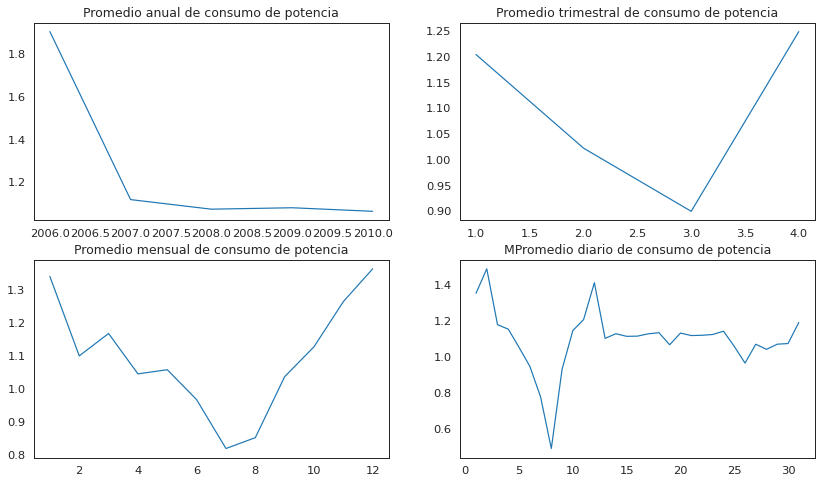

In [16]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('Año').Potencia_Activa.agg('mean').plot()
plt.xlabel('')
plt.title('Promedio anual de consumo de potencia')

plt.subplot(2,2,2)
df.groupby('Trimestre').Potencia_Activa.agg('mean').plot()
plt.xlabel('')
plt.title('Promedio trimestral de consumo de potencia')

plt.subplot(2,2,3)
df.groupby('Mes').Potencia_Activa.agg('mean').plot()
plt.xlabel('')
plt.title('Promedio mensual de consumo de potencia')

plt.subplot(2,2,4)
df.groupby('Día').Potencia_Activa.agg('mean').plot()
plt.xlabel('')
plt.title('MPromedio diario de consumo de potencia');

**Traza del Consumo de Potencia por cada año**

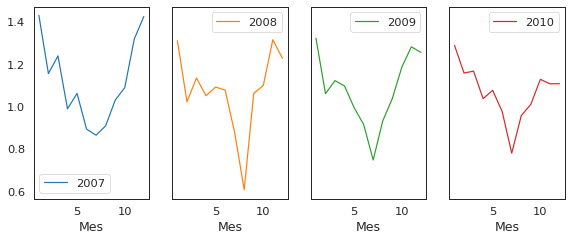

In [19]:
pd.pivot_table(df.loc[df['Año'] != 2006], values = "Potencia_Activa", 
               columns = "Año", index = "Mes").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

Nótese una similitud en las trazas de consumo en cada año, ocurriendo picos bajos de consumo en los meses de verano y alza hacia los meses de invierno.

**Consumo de Potencia en DIas Laborales VS Fin de Semana**

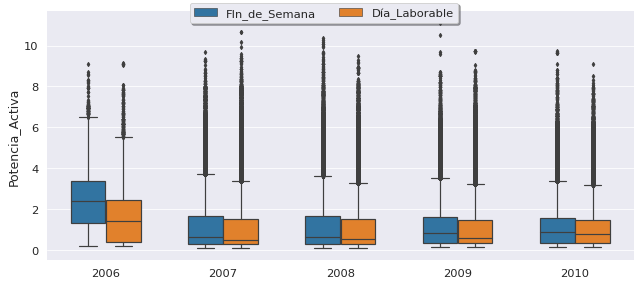

In [47]:
dic={0:'FIn_de_Semana',1:'Día_Laborable'}
df['Día'] = df.Día_Semana.map(dic)

a=plt.figure(figsize=(9,4)) 
plt1=sns.boxplot('Año','Potencia_Activa',hue='Día',width=0.6,fliersize=3,
                    data=df)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);

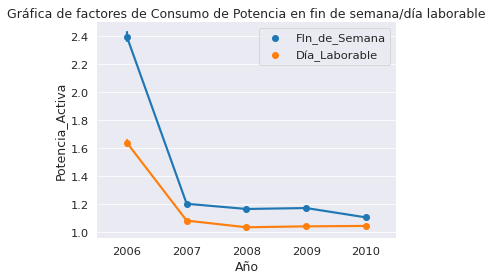

In [48]:
plt1=sns.factorplot('Año','Potencia_Activa',hue='Día',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Gráfica de factores de Consumo de Potencia en fin de semana/día laborable')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

**Características del Consumo de Potencia por meses**

In [ ]:
sumary_mena = df.groupby(
    by=['Año','Mes','Día'],
    as_index=False)[['Potencia_Activa']].mean()

In [41]:
summary_min = df.groupby(
    by=['Año','Mes','Día'],
    as_index=False)[['Potencia_Activa']].min()

In [42]:
summary_max = df.groupby(
    by=['Año','Mes','Día'],
    as_index=False)[['Potencia_Activa']].max()

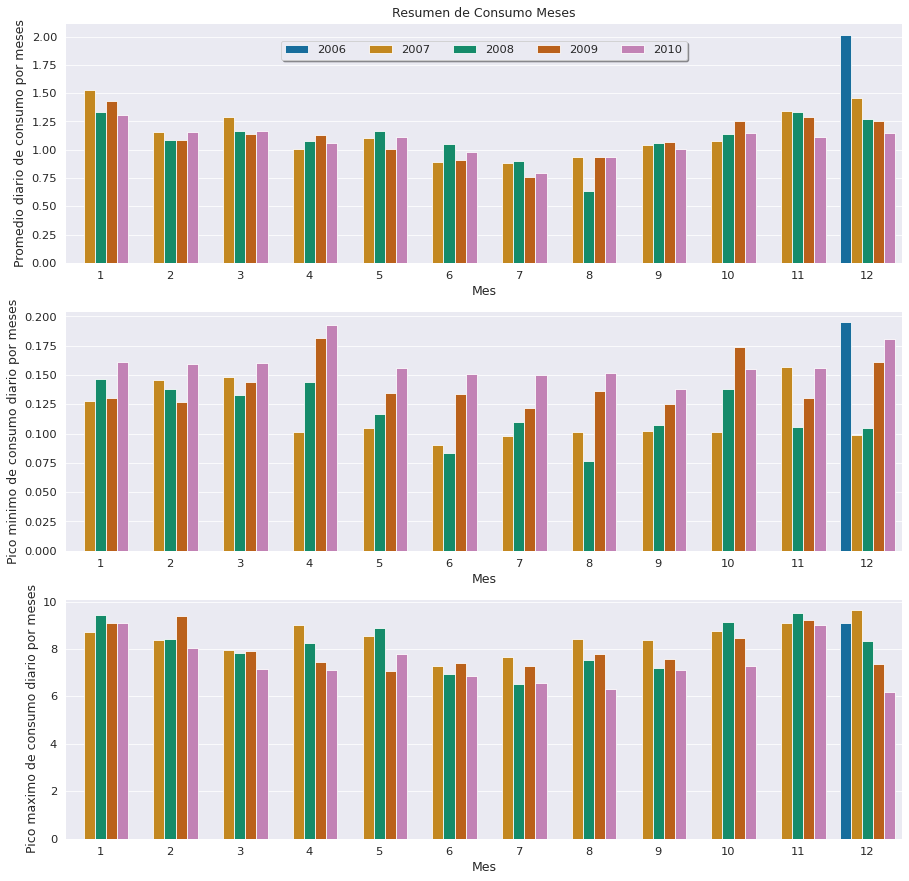

In [44]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3, figsize=(15, 15), sharex=False)

# Subplot de Media Mensual
mean = sns.barplot(x = summary.Mes,
            y = summary.Potencia_Activa,
            hue = summary.Año,
            palette = "colorblind",
            ax=axes[0],
            ci=None)
mean.set_title('Resumen de Consumo Meses')
mean.set_ylabel('Promedio diario de consumo por meses')
mean.legend_.remove()

# Subplot de Consumo Minimo Mensual
min = sns.barplot(x = summary_min.Mes,
            y = summary_min.Potencia_Activa,
            hue = summary_min.Año,
            palette="colorblind",
            ax=axes[1],
            ci=None)
min.legend_.remove()
min.set_ylabel('Pico minimo de consumo diario por meses')

# Subplot de Consumo Pico Mensual
max = sns.barplot(x = summary_max.Mes,
            y = summary_max.Potencia_Activa,
            hue = summary_max.Año,
            palette="colorblind",
            ax=axes[2],
            ci=None) 
max.set_ylabel('Pico maximo de consumo diario por meses')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 3.35), shadow=True, ncol=5)
